(1006, 7)


C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2537629258.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  setDatos.drop(["Fecha"], 1).hist()


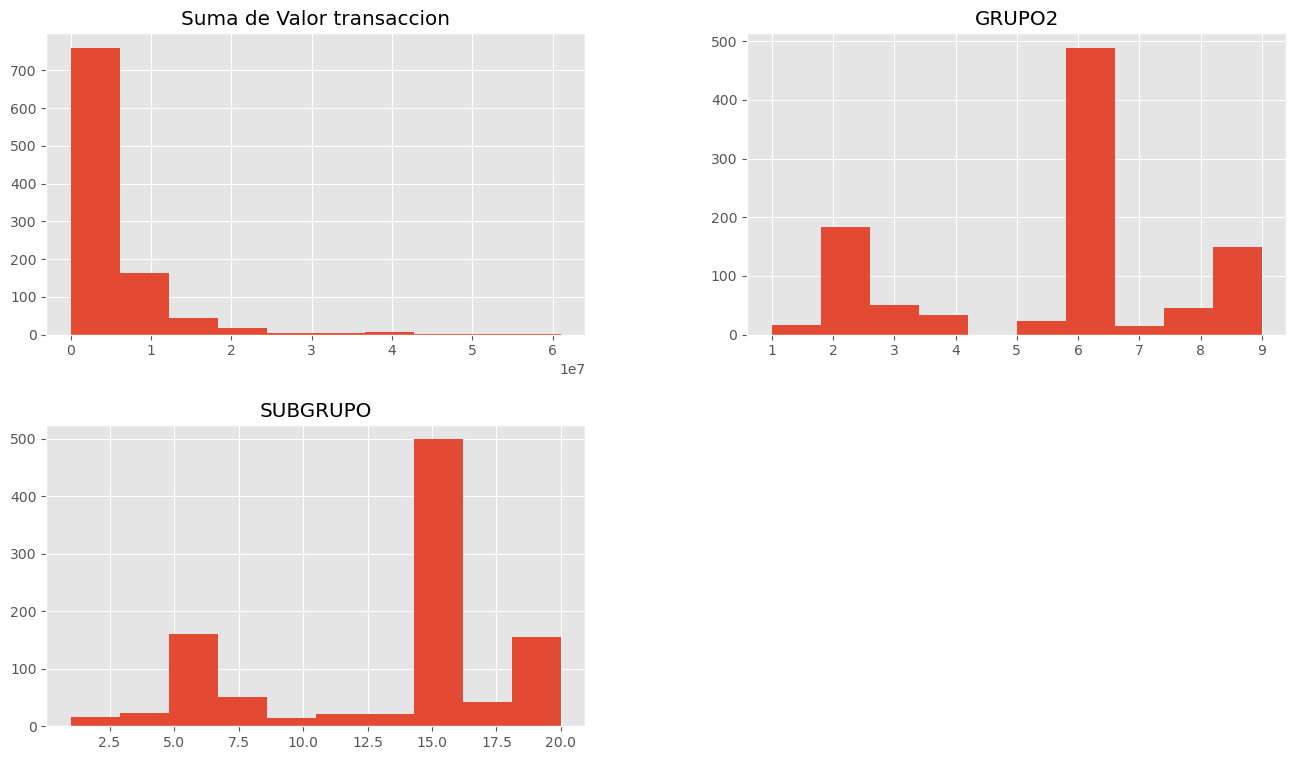

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime


%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


#cargamos los datos de entrada
setDatos = pd.read_csv("tabla datos2.csv")
#veamos cuantas dimensiones y registros contiene
print(setDatos.shape)

#Visualizamos rápidamente las caraterísticas de entrada
setDatos.drop(["Fecha"], 1).hist()
plt.show()

In [2]:
#Mostrar el set De datos, que ya se ordeno por Fecha dataTime
setDatos

,Fecha,Suma de Valor transaccion,GRUPO,SUB GRUPO,NAL/INTERNAL,GRUPO2,SUBGRUPO
0,01/01/2018,10000,Evento festivo,dias de descanso,Nacional,3,7
1,15/01/2018,100000,Evento Siniestro,Afectacion directa,Nacional,4,9
2,19/01/2018,120000,Evento economico,Comercio internacional,Internacional,6,15
3,26/01/2018,150000,Evento politico,Internacional,Internacional,2,5
4,31/01/2018,60000,Evento economico,Comercio internacional,Internacional,6,15
...,...,...,...,...,...,...,...
1001,27/12/2021,6286000,Evento deportivo,Alto impacto,Nacional,1,1
1002,28/12/2021,7785846,Evento politico,Internacional,Internacional,2,5
1003,29/12/2021,14767000,Evento politico,Consultas y decisiones,Nacional,2,6
1004,30/12/2021,12700000,Evento de salud publica,Pandemia Covid - 19,Nacional,9,20


In [3]:
#para Cada Dato por subGrupo Crear una lista de nuevos set de datos
def extraerSubGrupos(data, idSubGrupo):
    return data[(data["SUBGRUPO"] == idSubGrupo )]


#Sacar todos los subgrupos
tiposSubGrupos = setDatos["SUBGRUPO"].unique() #.columns.unique()

#Ordenar los subgrupos para que salgan en orden
tiposSubGrupos=sorted(tiposSubGrupos)

#Extraer los datos por cada subgrupo
SubGrupos = list()
colores = list()

#Repositorio de colores para plotear mcolors.CSS4_COLORS con todos los colores css
coloresDisponibles = list(map(str, mcolors.CSS4_COLORS.values()))


#Extraer cada tablita pequeña, "Filtro por numero de subgrupo"
for subGrupo in tiposSubGrupos:
    #  Iniciar la extraccion en cada dataset
    SubGrupos.append(extraerSubGrupos(setDatos, subGrupo))
    
    #Agregar los colores para cada grafico despues del 14
    colores.append(coloresDisponibles[subGrupo+30])

    
#Mostrar el tamaño
print(len(SubGrupos))

#Mostral la lista de Subgrupos
print(tiposSubGrupos)

#motrar el suggrupo por el indice que usted escoja
SubGrupos[1]



20
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


,Fecha,Suma de Valor transaccion,GRUPO,SUB GRUPO,NAL/INTERNAL,GRUPO2,SUBGRUPO
5,05/02/2018,10000,Evento deportivo,Impacto local,Nacional,1,2
213,28/06/2019,450000,Evento deportivo,Impacto local,Nacional,1,2
456,30/06/2020,3974000,Evento deportivo,Impacto local,Nacional,1,2




for i in range(1):
    x = SubGrupos[i]["Fecha"].values
    y = SubGrupos[i]["Suma de Valor transaccion"].values
    
    #Tome los datos reales y vuevalos fecha date time y luego numeros cardinales
    datos = SubGrupos[i]
    datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
    datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())
    
    X = datos[['Fecha']]
    y_ = datos['Suma de Valor transaccion']
    
    #Crear objeto de entrenamiento regresion lineal
    regresion = linear_model.LinearRegression()
    
    # Entrenamos nuestro modelo
    regresion.fit(X, y_)
    
    # Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
    predicciones = regresion.predict(X)
    
    # Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
    print('Coefficients: \n', regresion.coef_)

    # Este es el valor donde corta el eje Y (en X=0)
    print('Independent term: \n', regresion.intercept_)

    # Error Cuadrado Medio
    print("Mean squared error: %.2f" % mean_squared_error(y, predicciones))

    # Puntaje de Varianza. El mejor puntaje es un 1.0
    print('Variance score: %.2f' % r2_score(y, predicciones))

    plt.xlabel('Fecha')
    plt.ylabel('Ingresos')
    plt.title('Regresión Lineal de Ingresos')
    
    
    plt.scatter(datos["Fecha"], y, c=colores[i], s=100, marker ="s", edgecolor ="black", label = "Datos Reales")
    plt.plot(datos["Fecha"], predicciones, color='black', label='Regresión lineal')
    #plt.scatter(x, y, c=colores[i], s= 200,  marker ="s", edgecolor ="black")
    plt.legend()
    
    # Mostrar ecuación en el gráfico
    
    ecuacion = f"Ingresos = {regresion.coef_[0]:.2f} * Fecha_Num + ({regresion.intercept_:.2f})"
    plt.text(datos['Fecha'].iloc[0], y_.max(), ecuacion, fontsize=14)
    
    
    plt.plot(datos['Fecha'], y_)


#Rotulos de eje x
plt.xticks(rotation=90) 
plt.show()

Coefficients: 
 [6983.29019056]
Independent term: 
 -5148256818.912022
Mean squared error: 11893337373385.76
Variance score: 0.17


C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


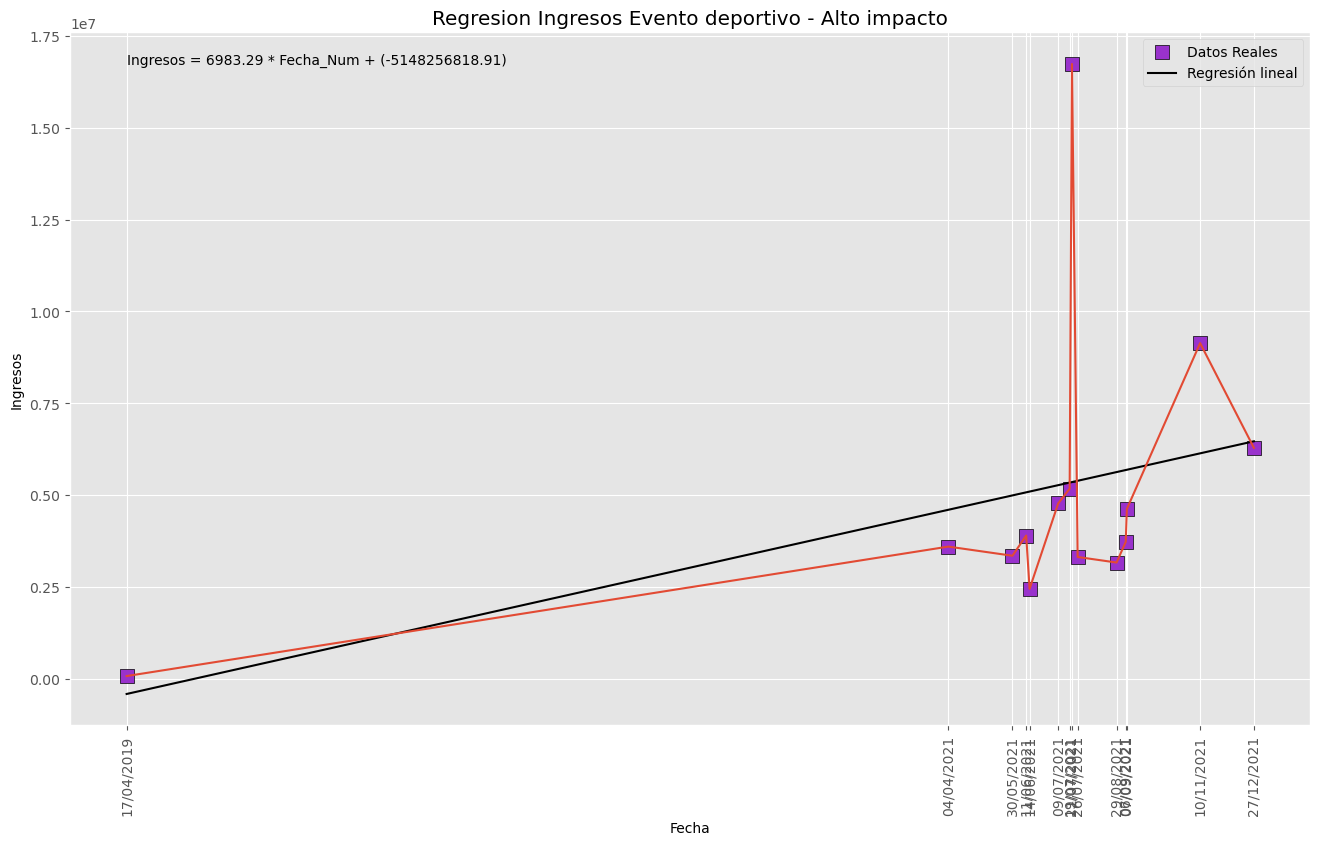

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [4300.94825923]
Independent term: 
 -3169143781.8176794
Mean squared error: 761292079573.13
Variance score: 0.76


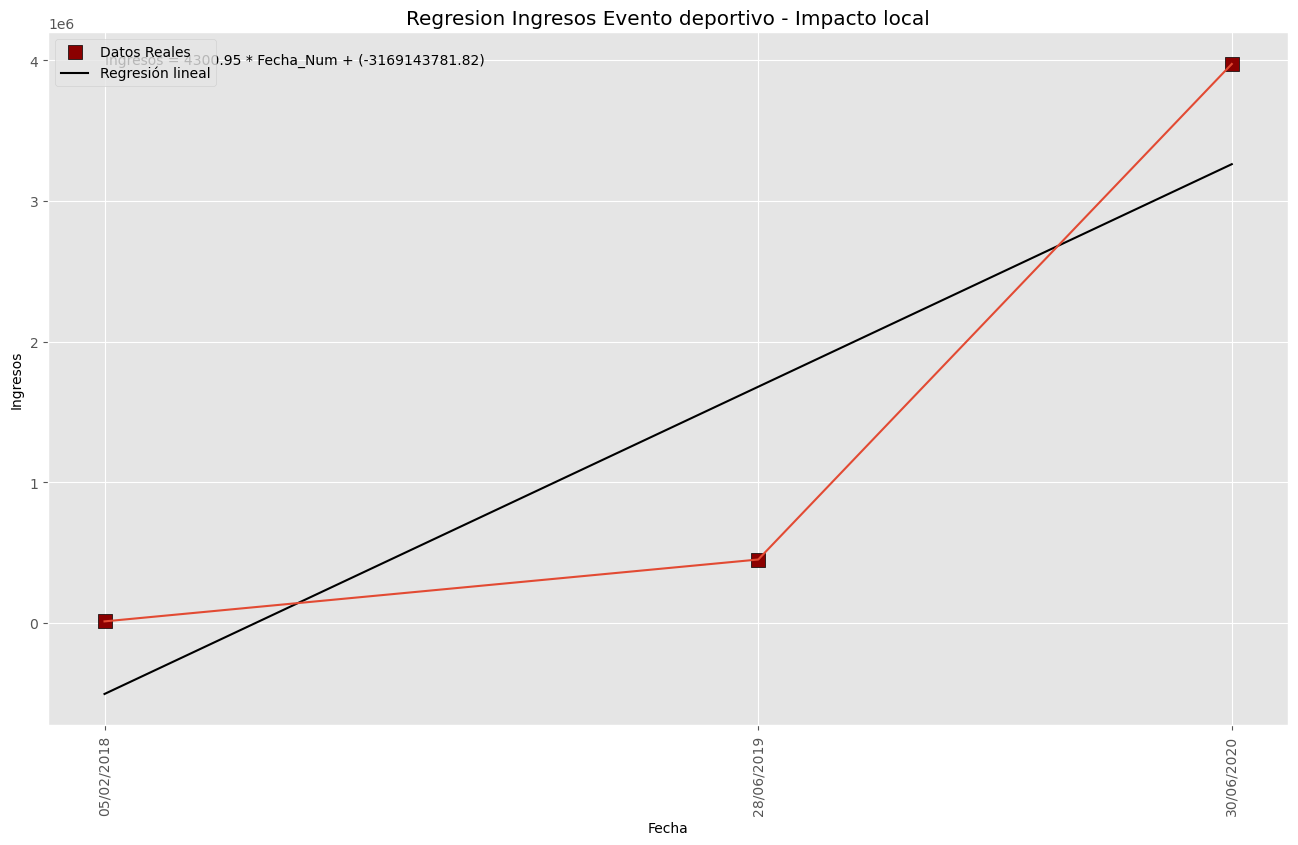

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [1019.88838283]
Independent term: 
 -751354389.6446918
Mean squared error: 216570517866.79
Variance score: 0.52


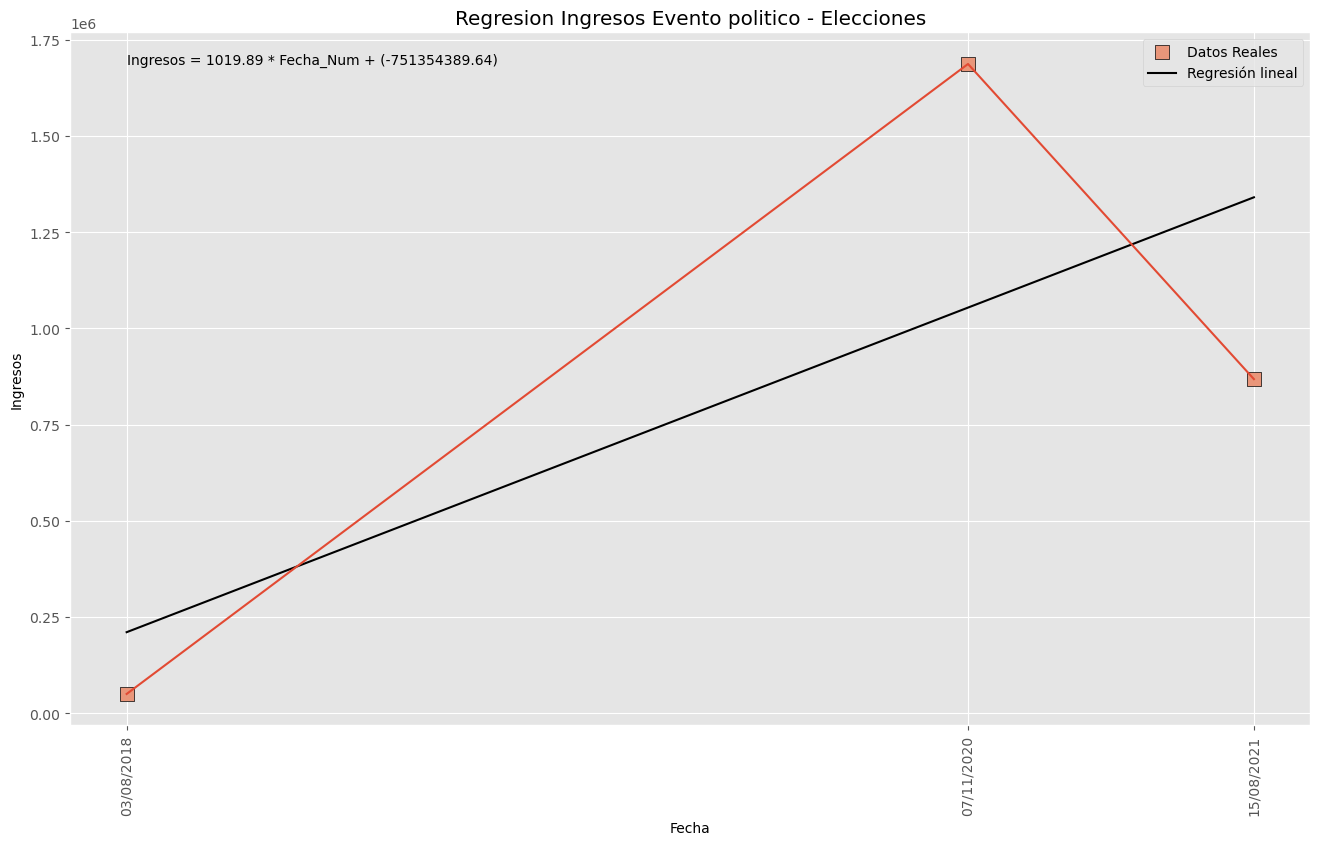

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [4297.49416731]
Independent term: 
 -3167378831.340035
Mean squared error: 2890824459383.07
Variance score: 0.49


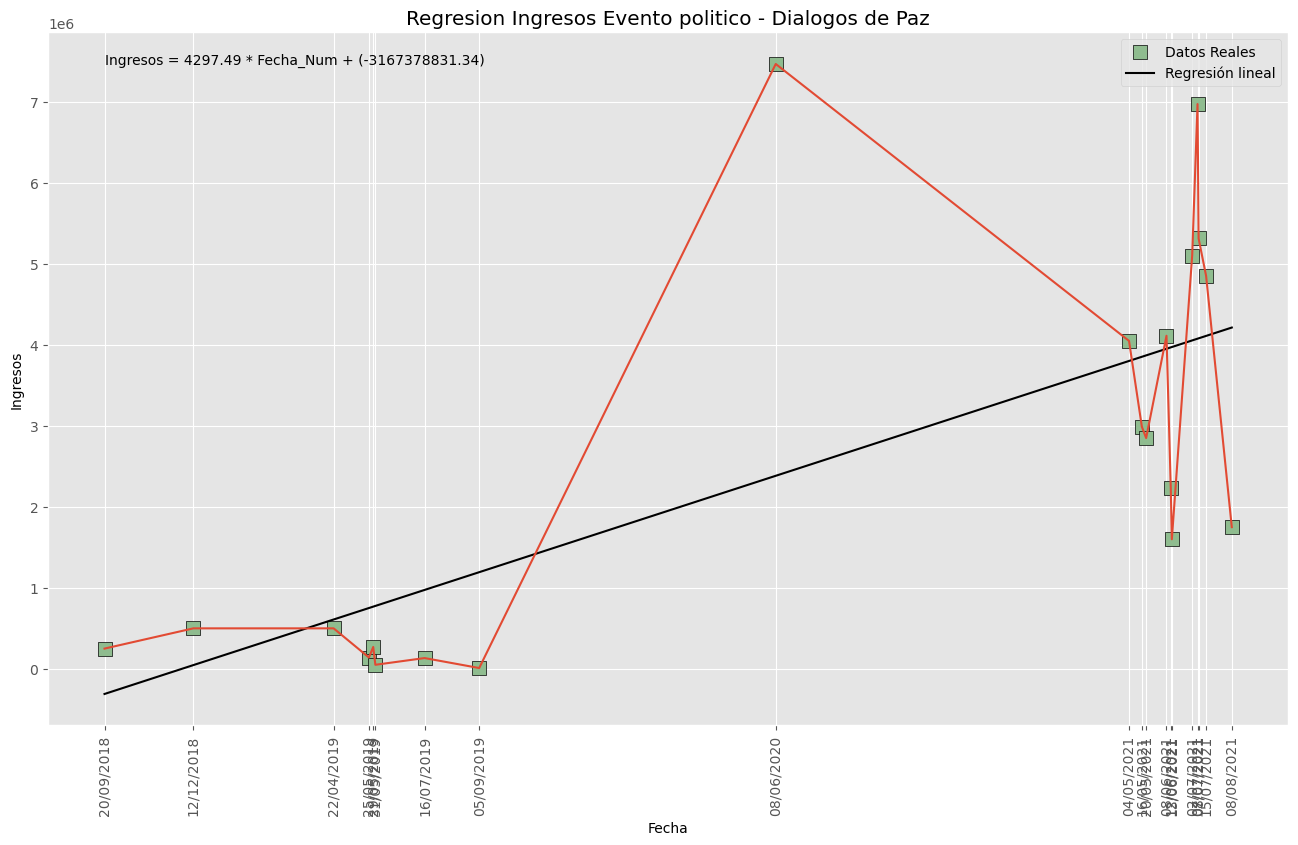

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [4123.99351444]
Independent term: 
 -3038861313.4195924
Mean squared error: 6352664969331.73
Variance score: 0.35


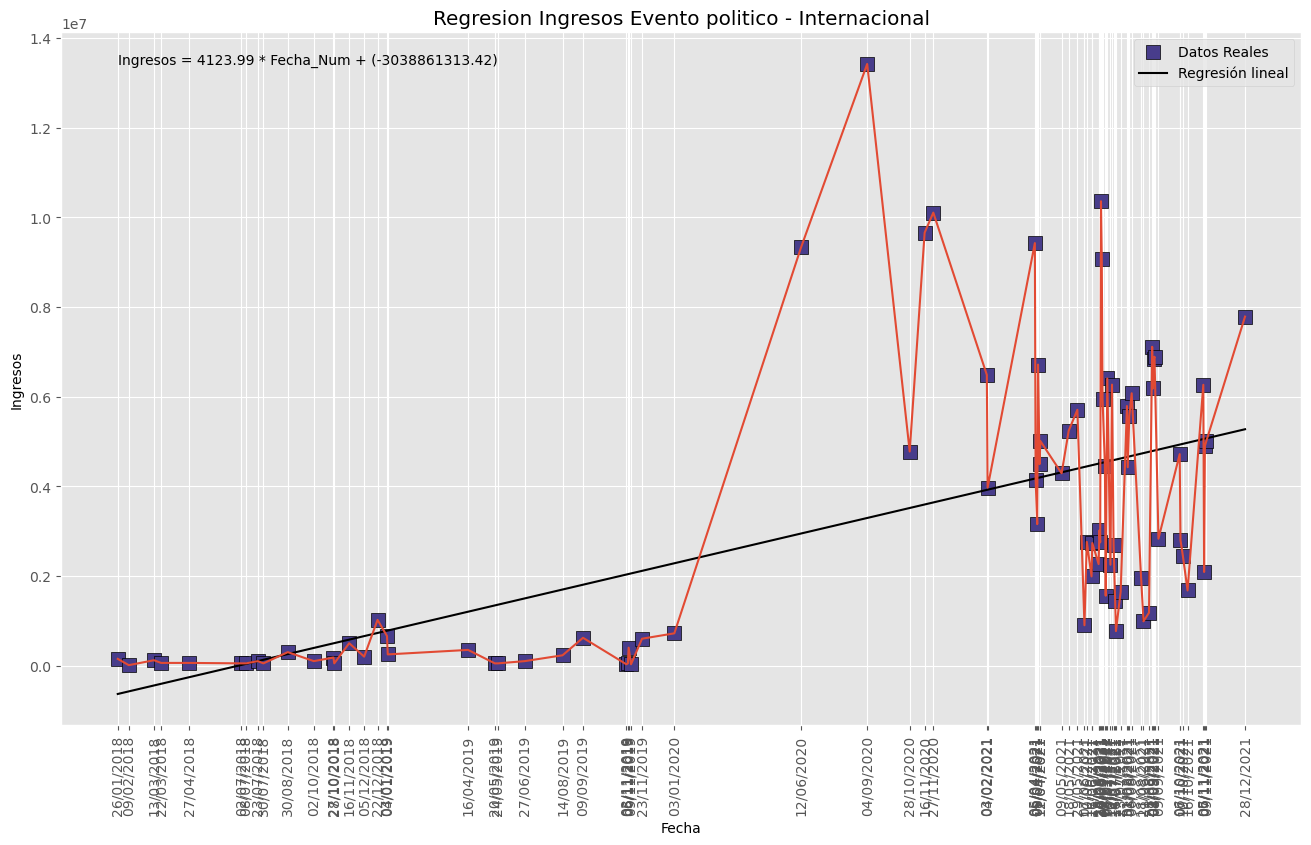

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [6841.415836]
Independent term: 
 -5042527824.715359
Mean squared error: 10039027469878.48
Variance score: 0.40


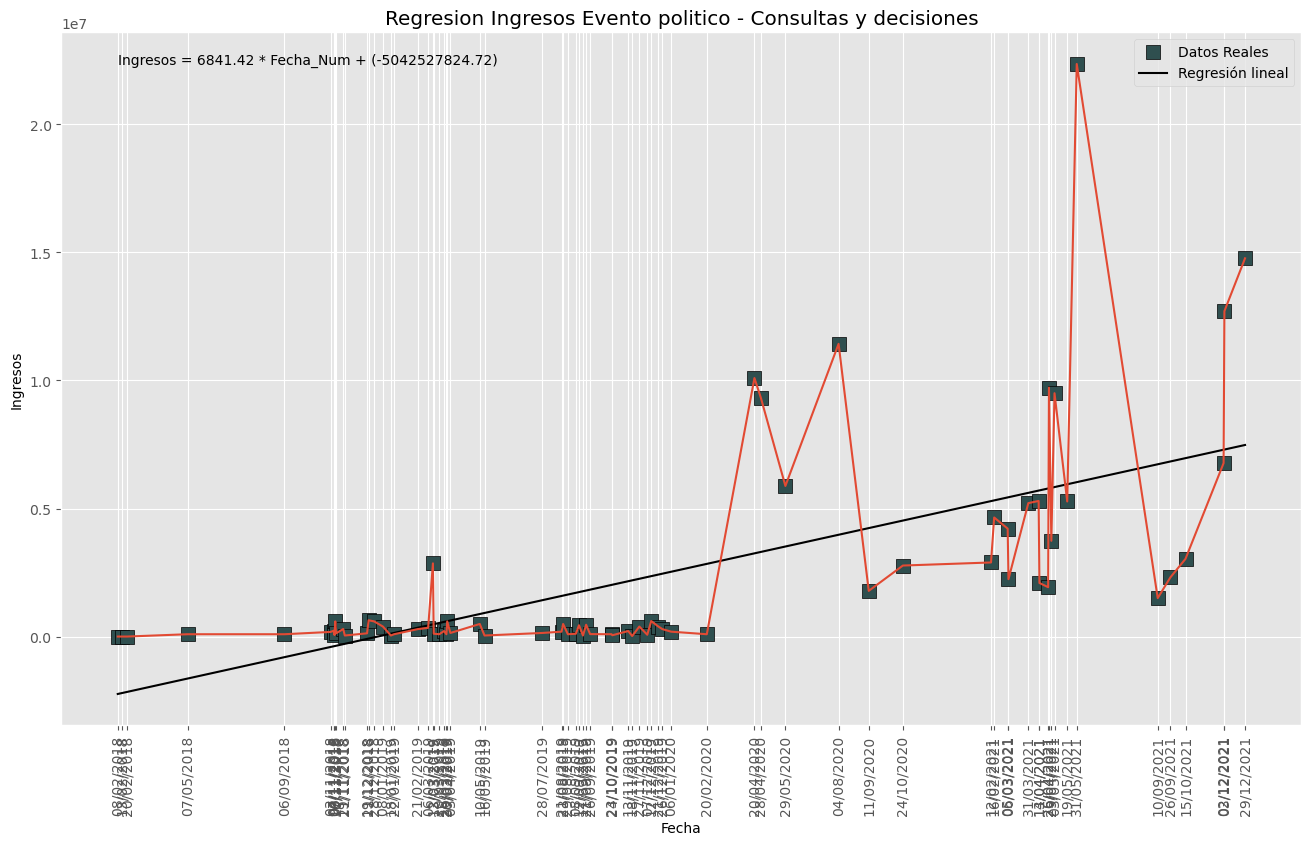

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [4506.27751082]
Independent term: 
 -3319504910.632614
Mean squared error: 28231381128206.93
Variance score: 0.10


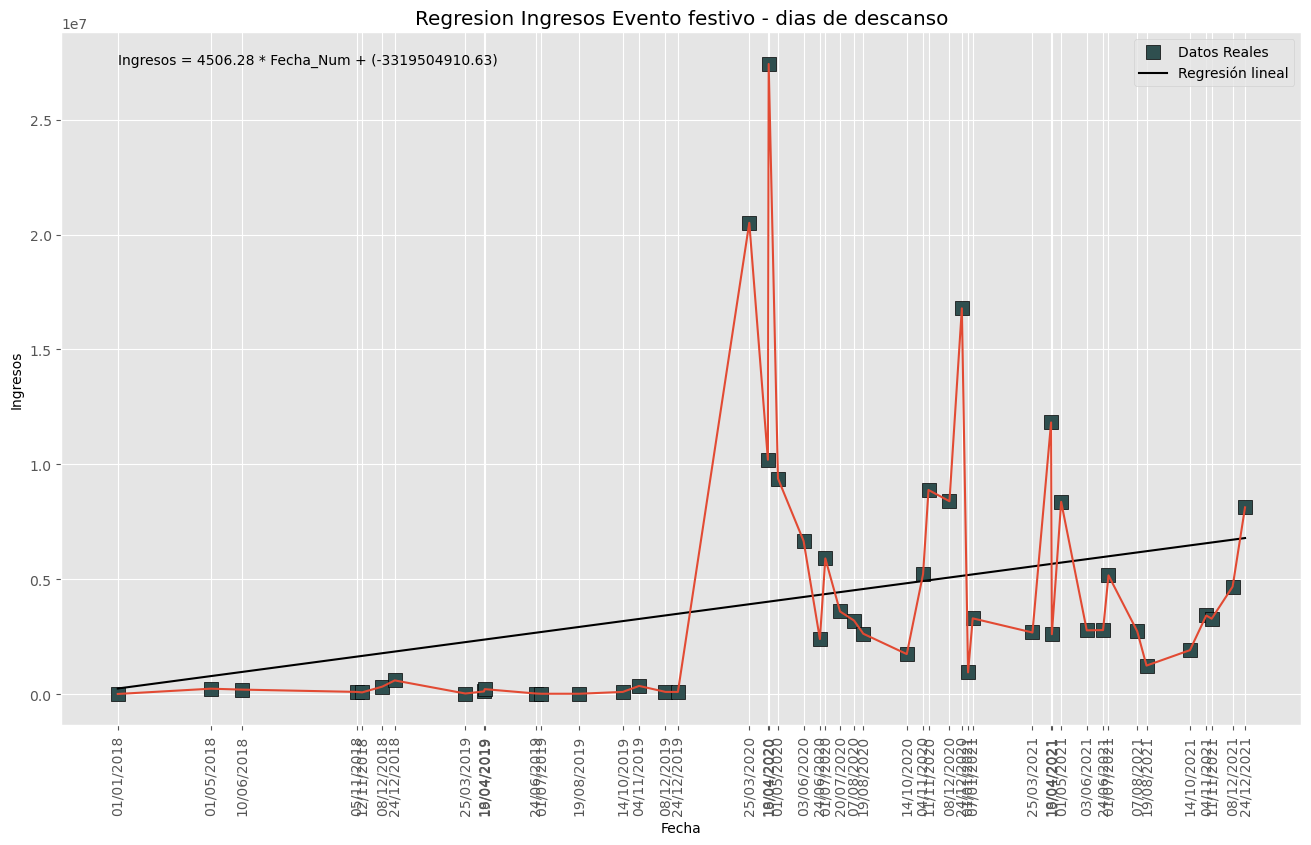

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [2601.23548883]
Independent term: 
 -1916164227.3932674
Mean squared error: 2284856977061.15
Variance score: 0.38


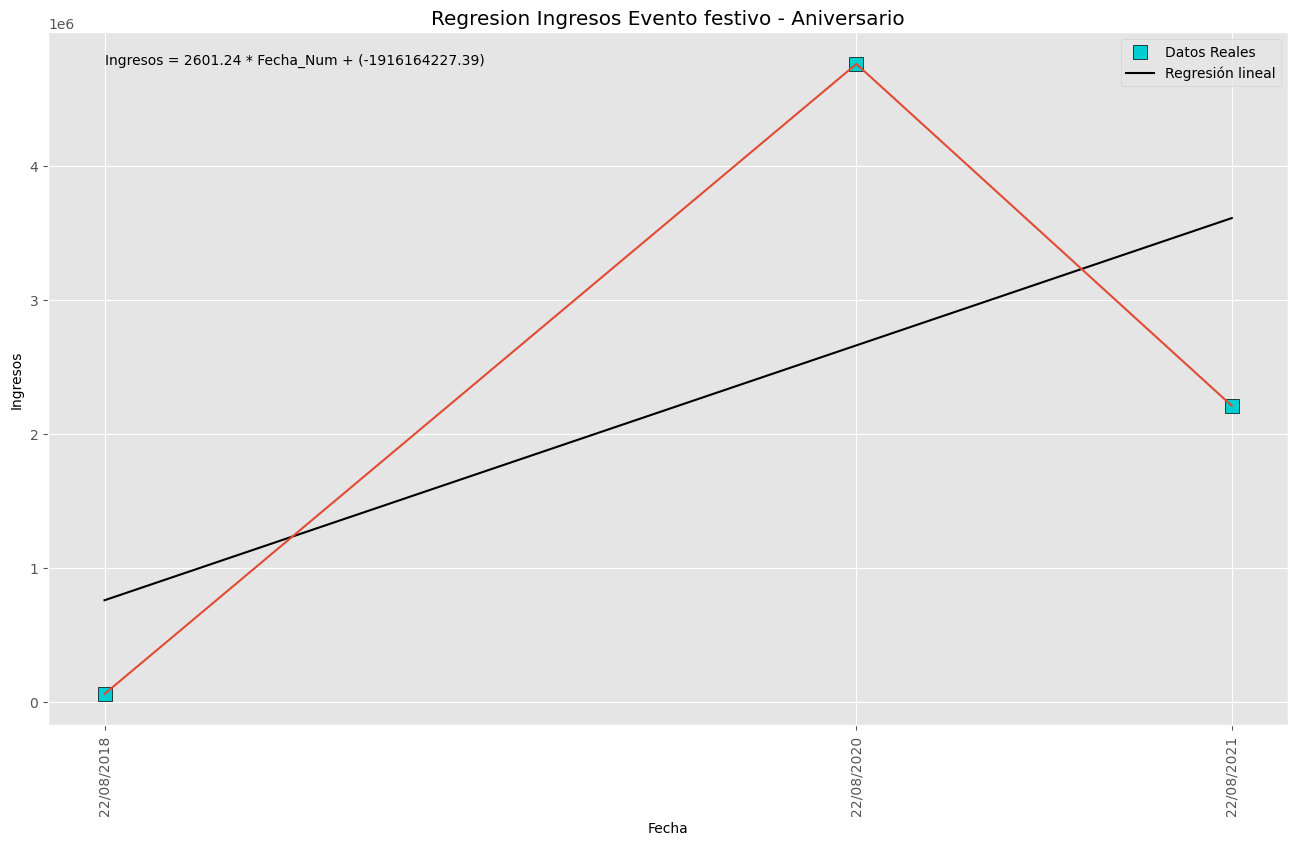

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [6177.3716432]
Independent term: 
 -4552277425.959102
Mean squared error: 9940169232373.52
Variance score: 0.45


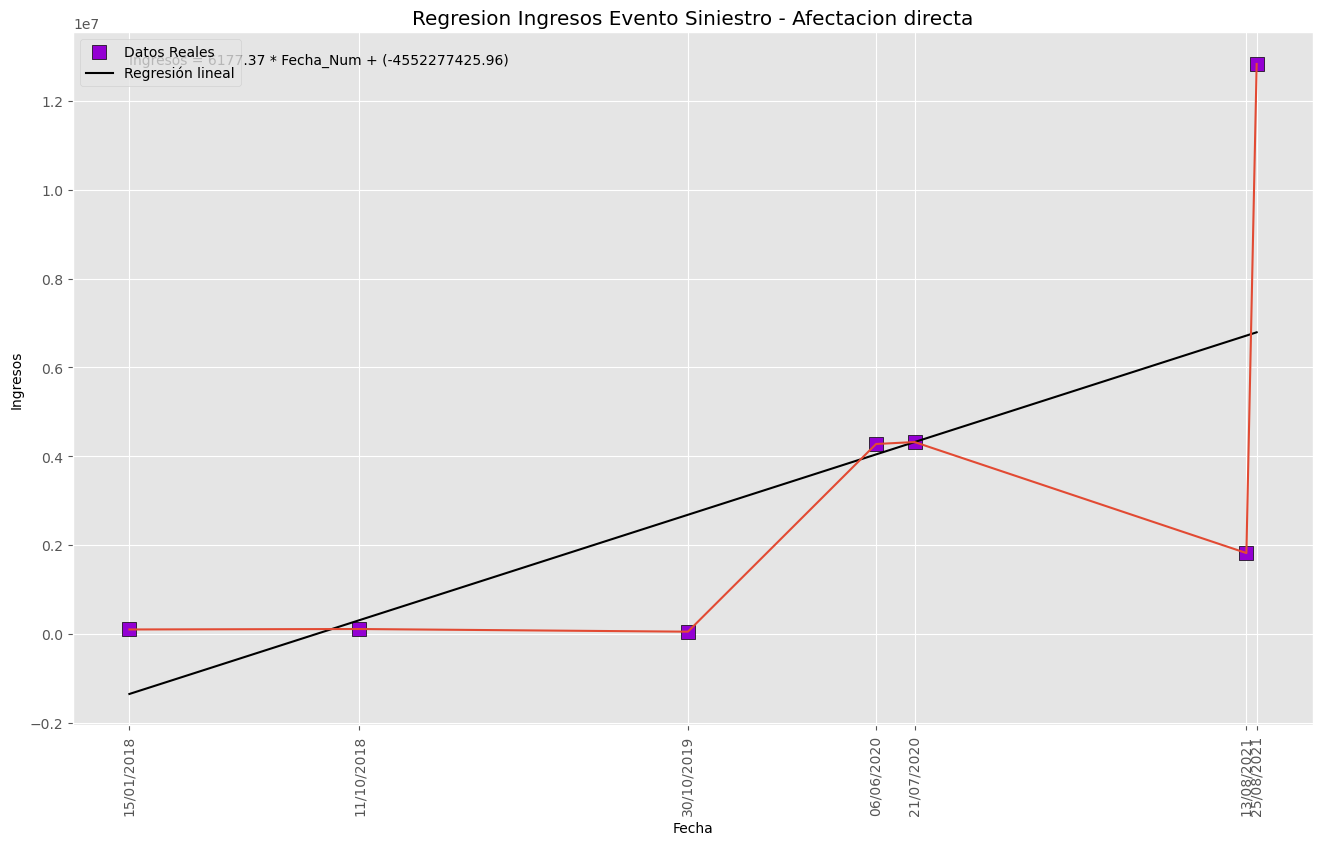

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [3088.17023645]
Independent term: 
 -2275447722.6056
Mean squared error: 510885093436.68
Variance score: 0.84


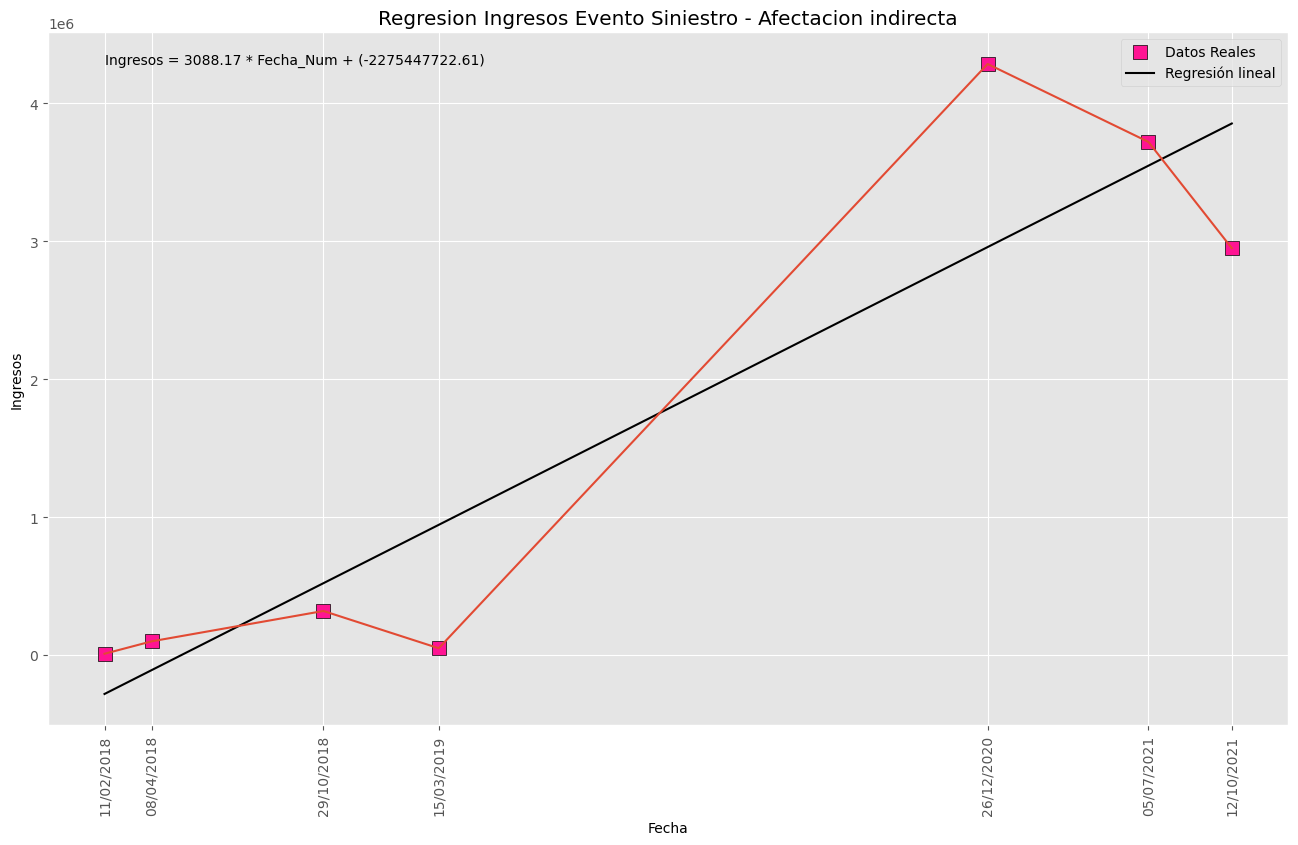

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [4562.75217534]
Independent term: 
 -3362131366.438789
Mean squared error: 11491530172429.88
Variance score: 0.30


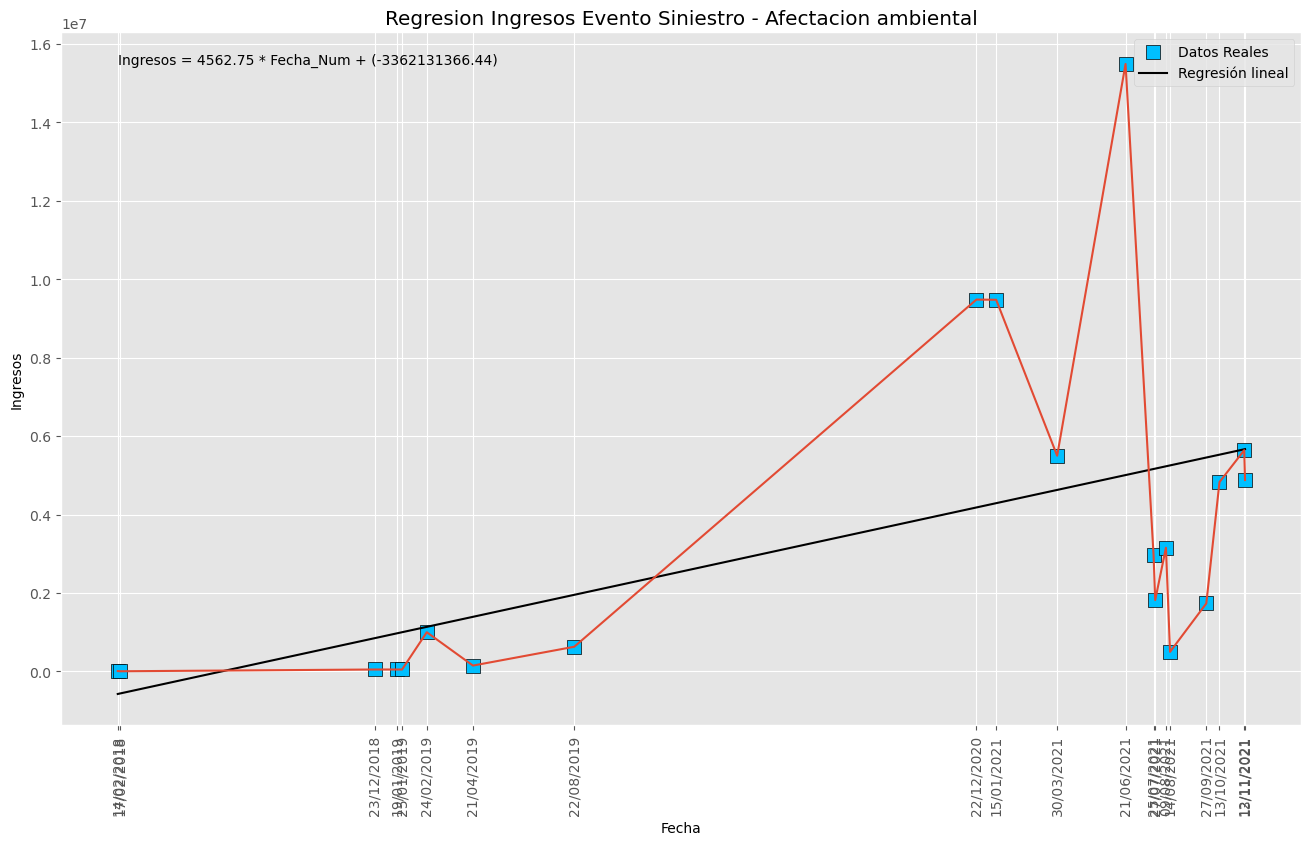

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())
C:\Users\JONATHAN GONZALEZ\.conda\envs\VISIONARTIFICIAL\lib\site-packages\sklearn\metrics\_regression.py:918: Undefin

Coefficients: 
 [0.]
Independent term: 
 290000.0
Mean squared error: 0.00
Variance score: nan


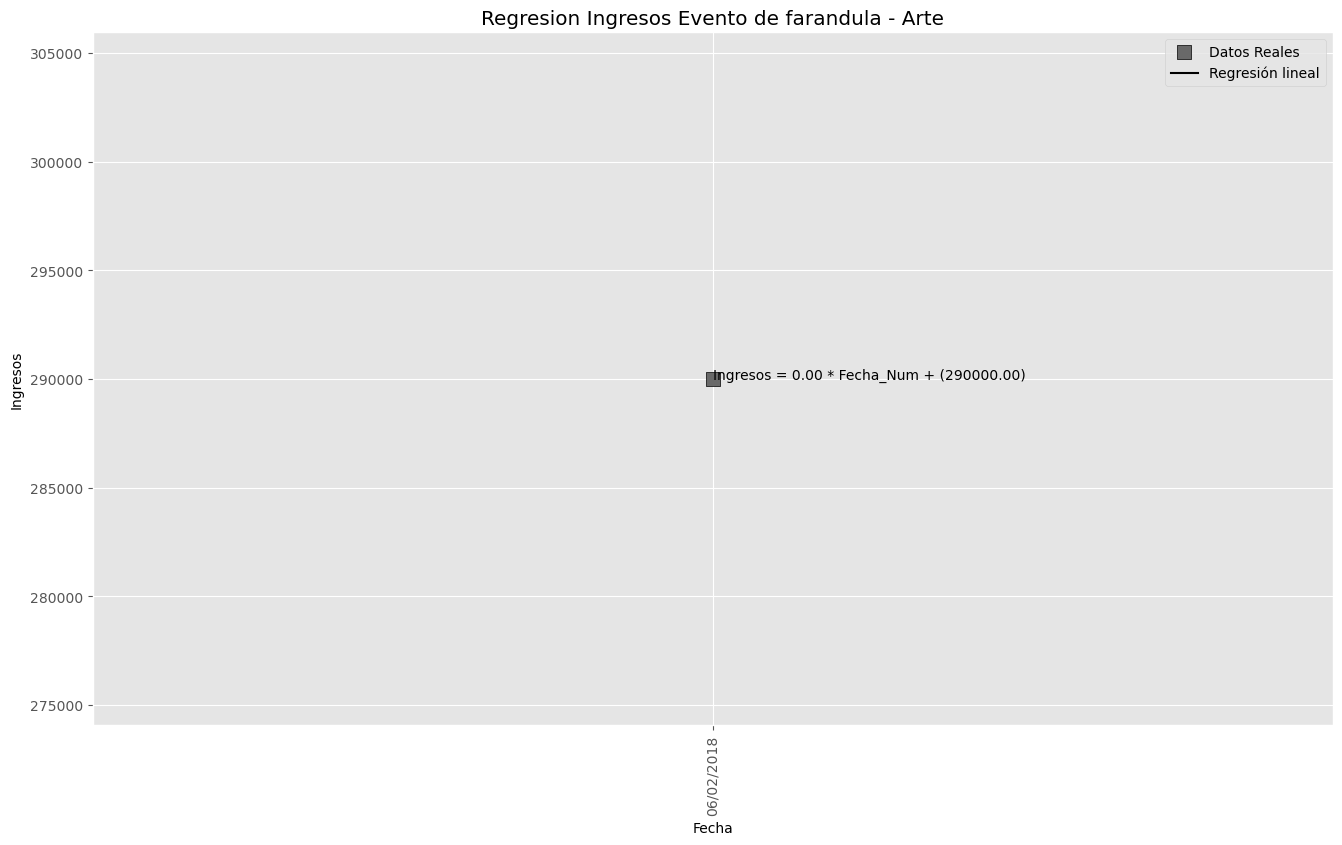

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [5178.66672301]
Independent term: 
 -3816745285.110308
Mean squared error: 8311491045356.45
Variance score: 0.37


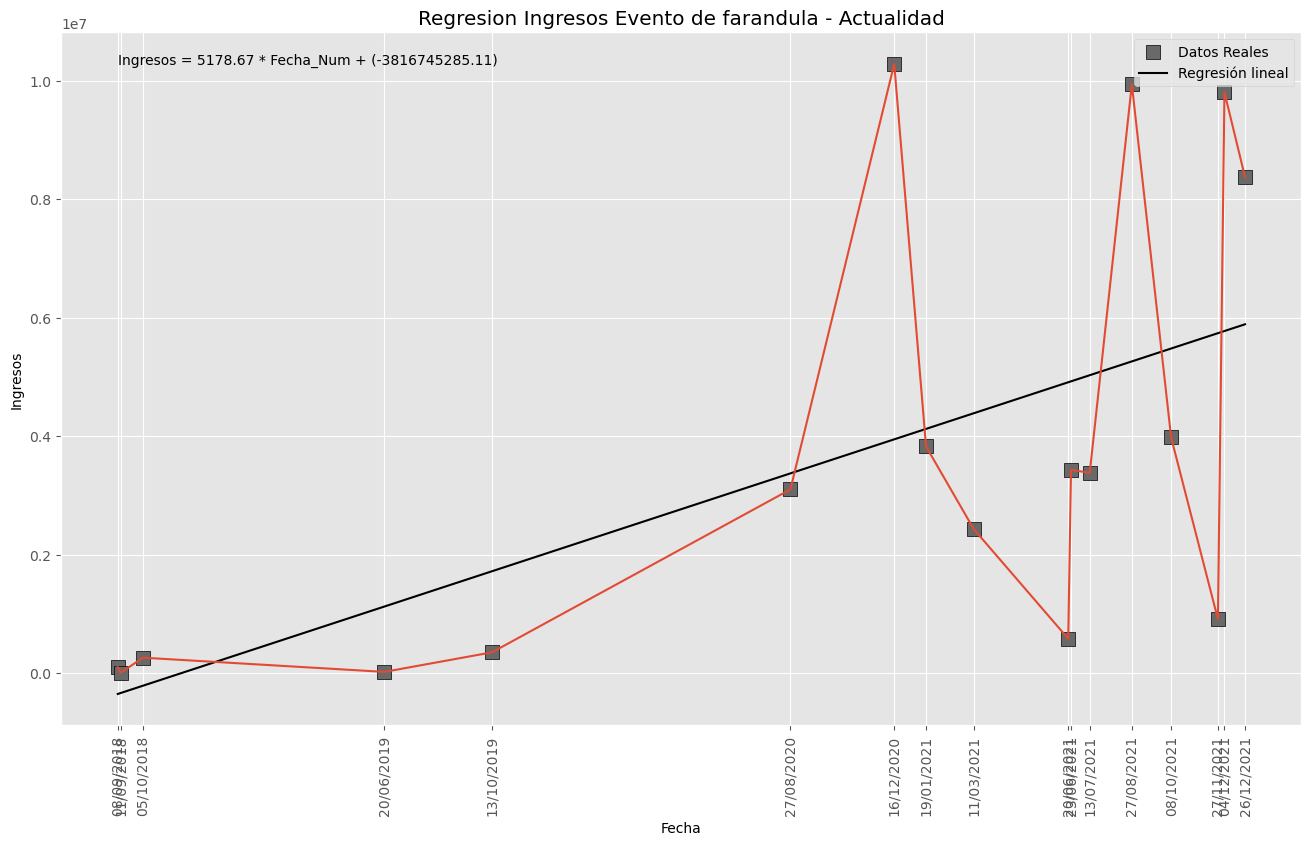

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [3059.75059088]
Independent term: 
 -2254607852.6014404
Mean squared error: 813239026821.46
Variance score: 0.73


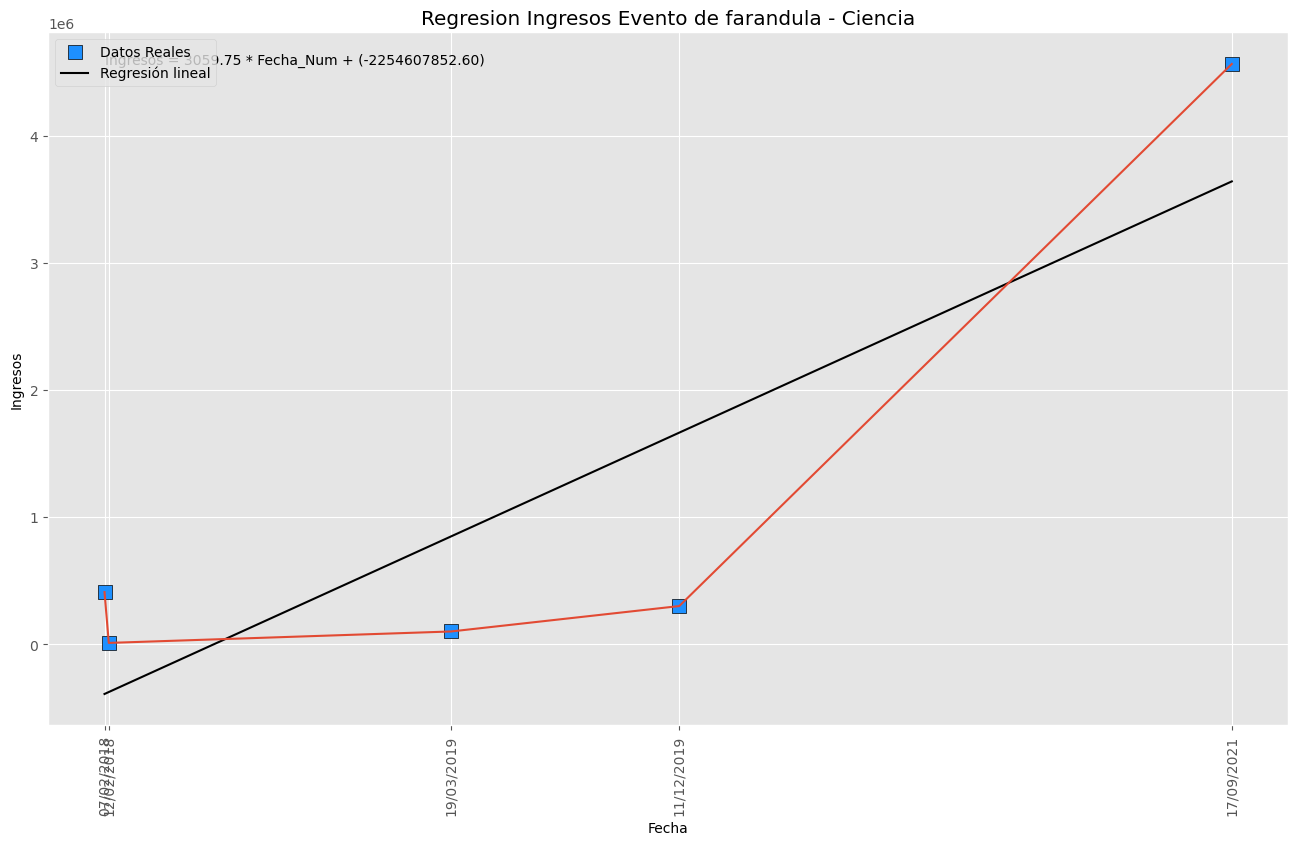

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [6764.39895208]
Independent term: 
 -4984630478.96169
Mean squared error: 24891633079417.50
Variance score: 0.20


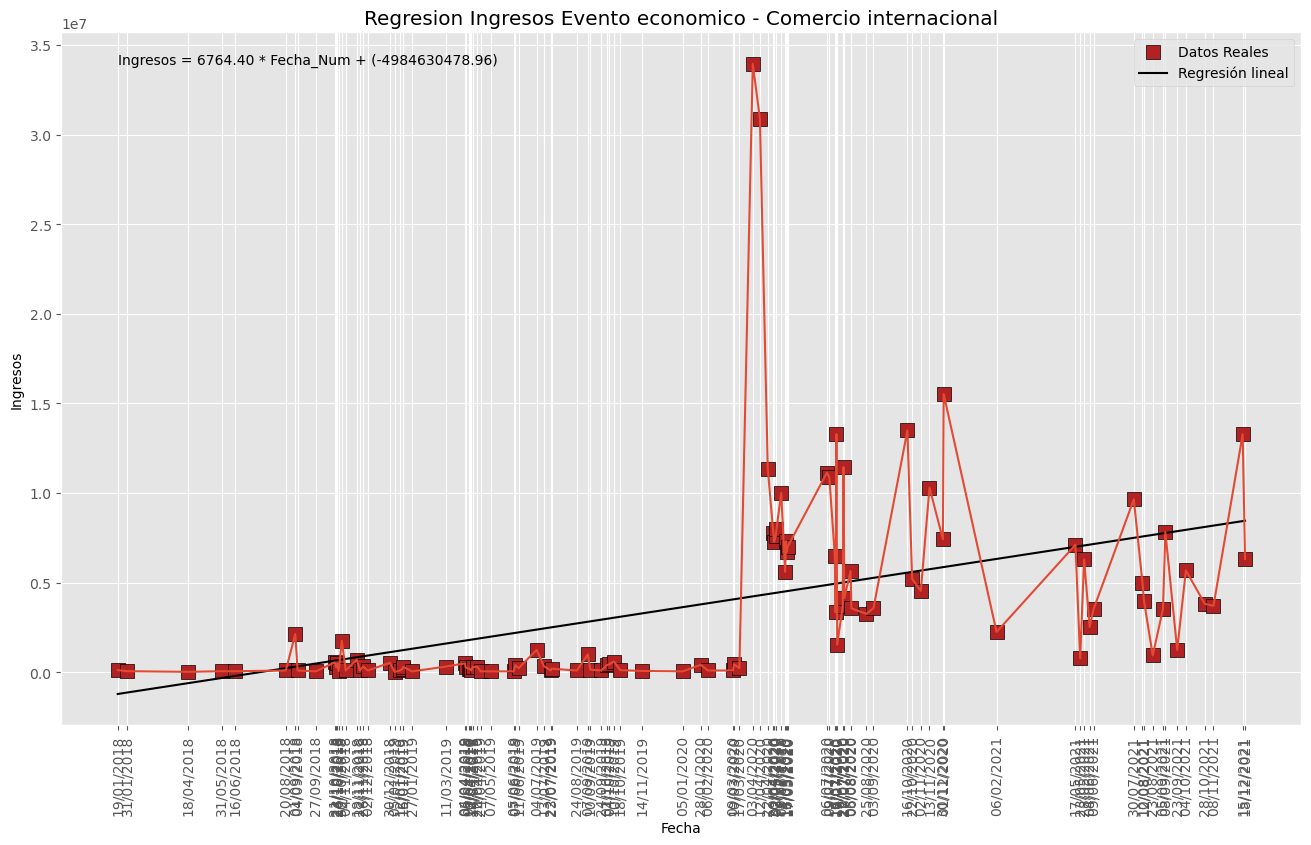

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [6152.93929642]
Independent term: 
 -4533629147.491657
Mean squared error: 39847149859121.41
Variance score: 0.10


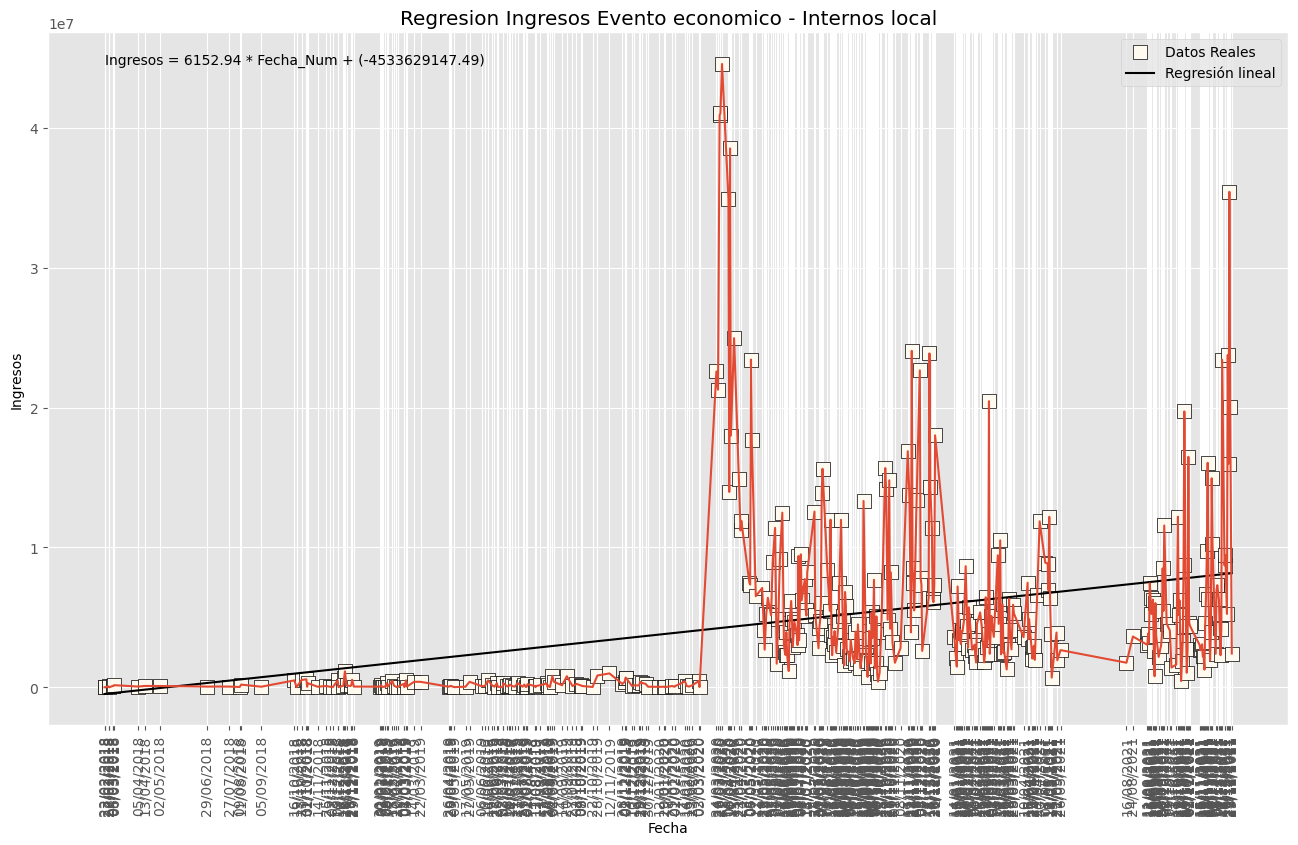

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [5733.14778663]
Independent term: 
 -4224297253.55794
Mean squared error: 6533017260673.47
Variance score: 0.65


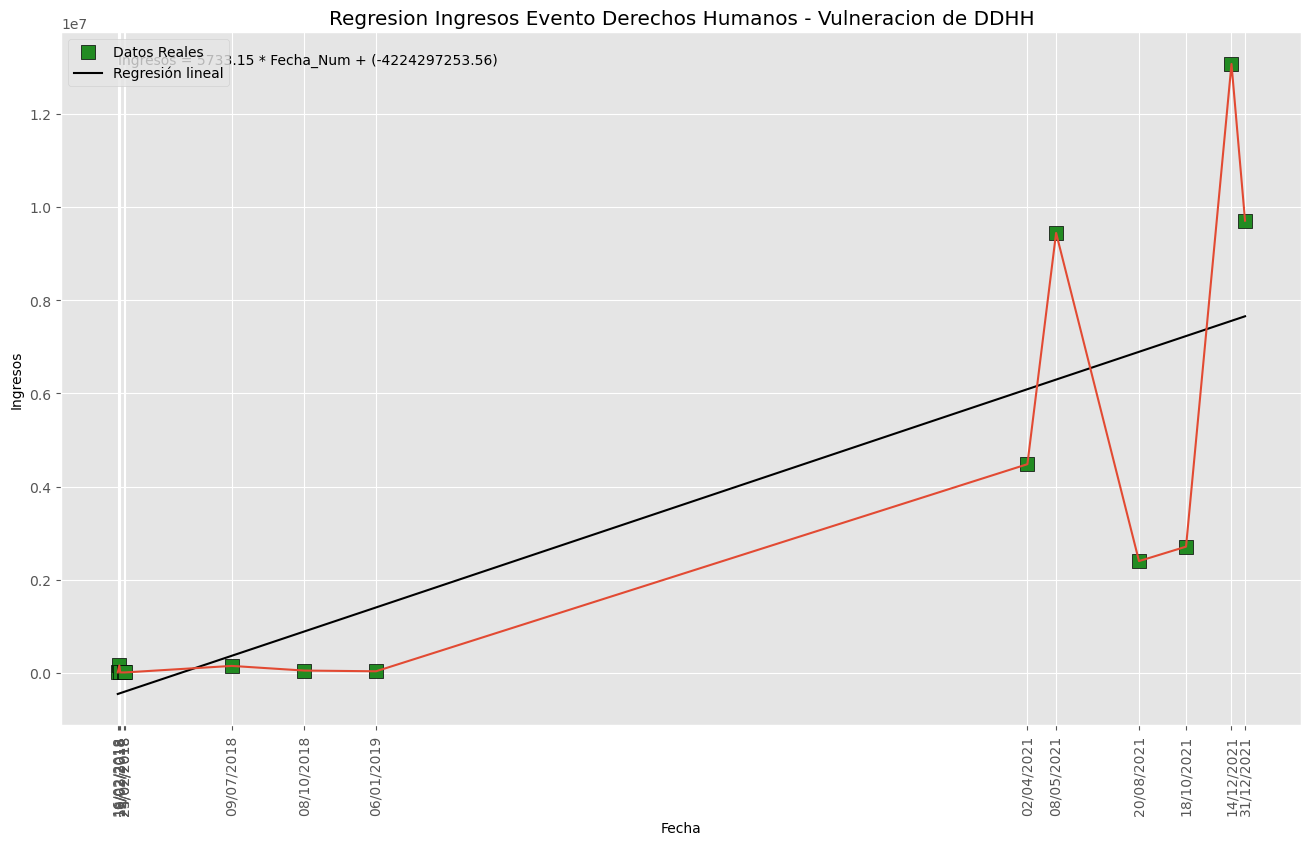

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [6228.21828929]
Independent term: 
 -4590288699.9119625
Mean squared error: 9925118927804.32
Variance score: 0.35


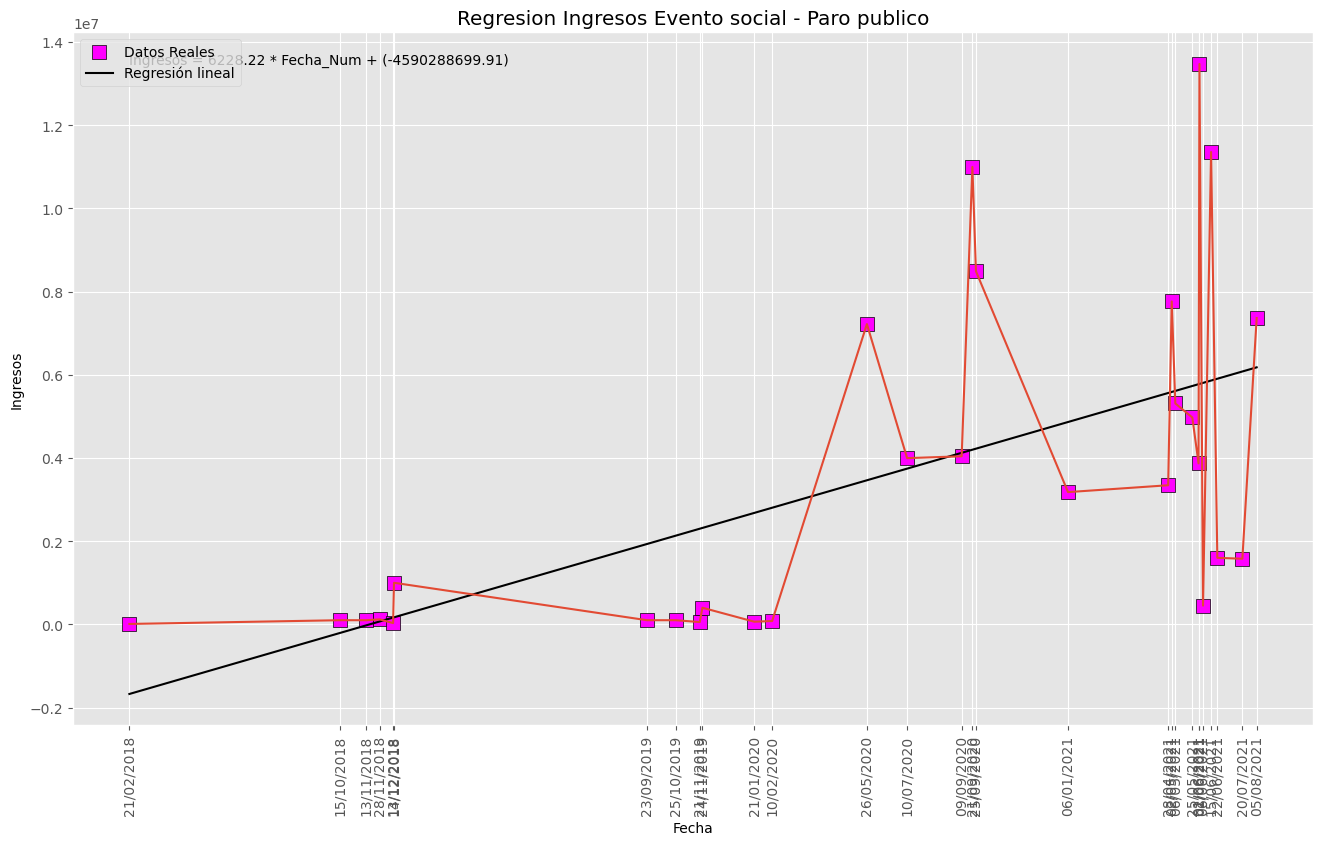

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [6537.40548842]
Independent term: 
 -4818365477.0647955
Mean squared error: 16206139614943.28
Variance score: 0.29


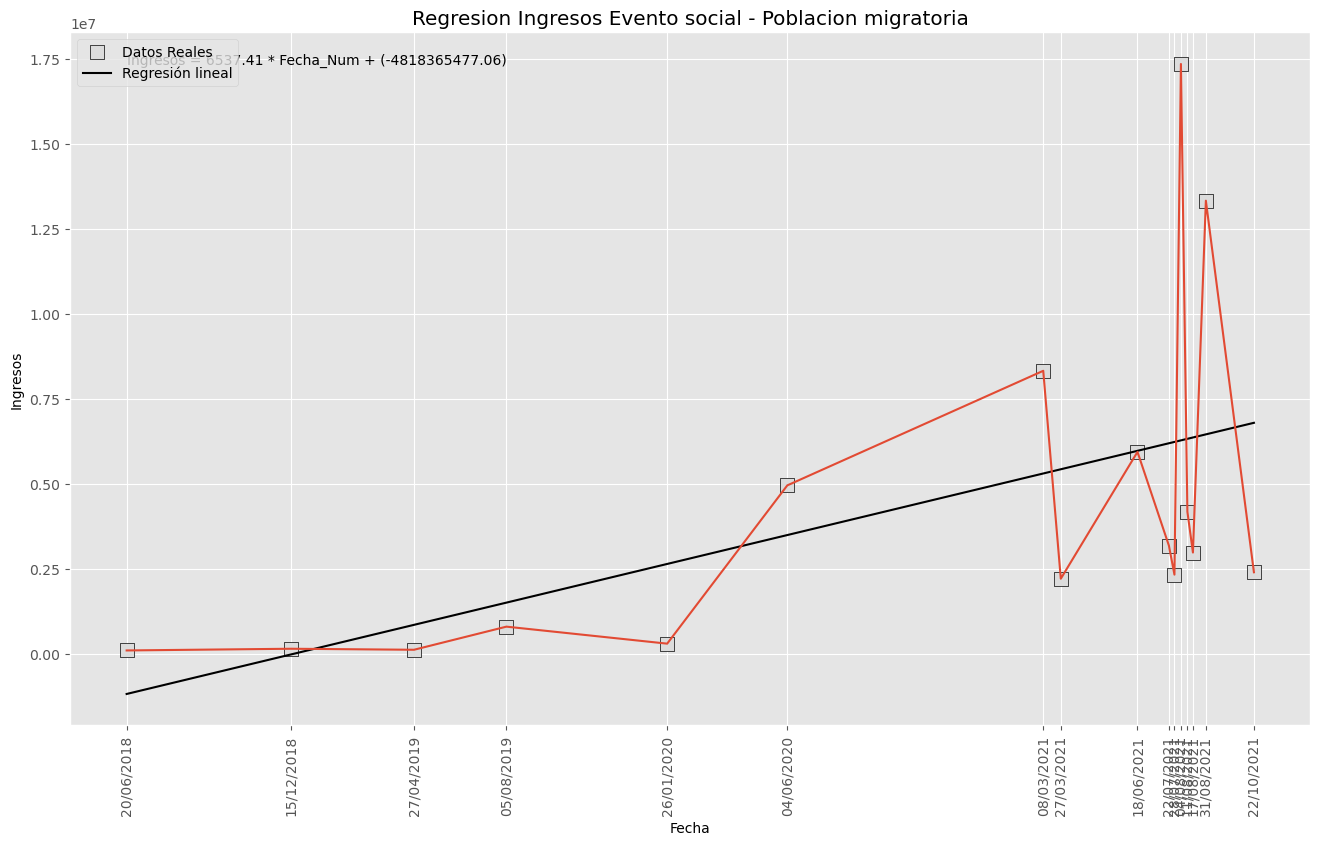

C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_37296\2435012173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())


Coefficients: 
 [-18076.80546334]
Independent term: 
 13344109781.776566
Mean squared error: 130091020126022.42
Variance score: 0.07


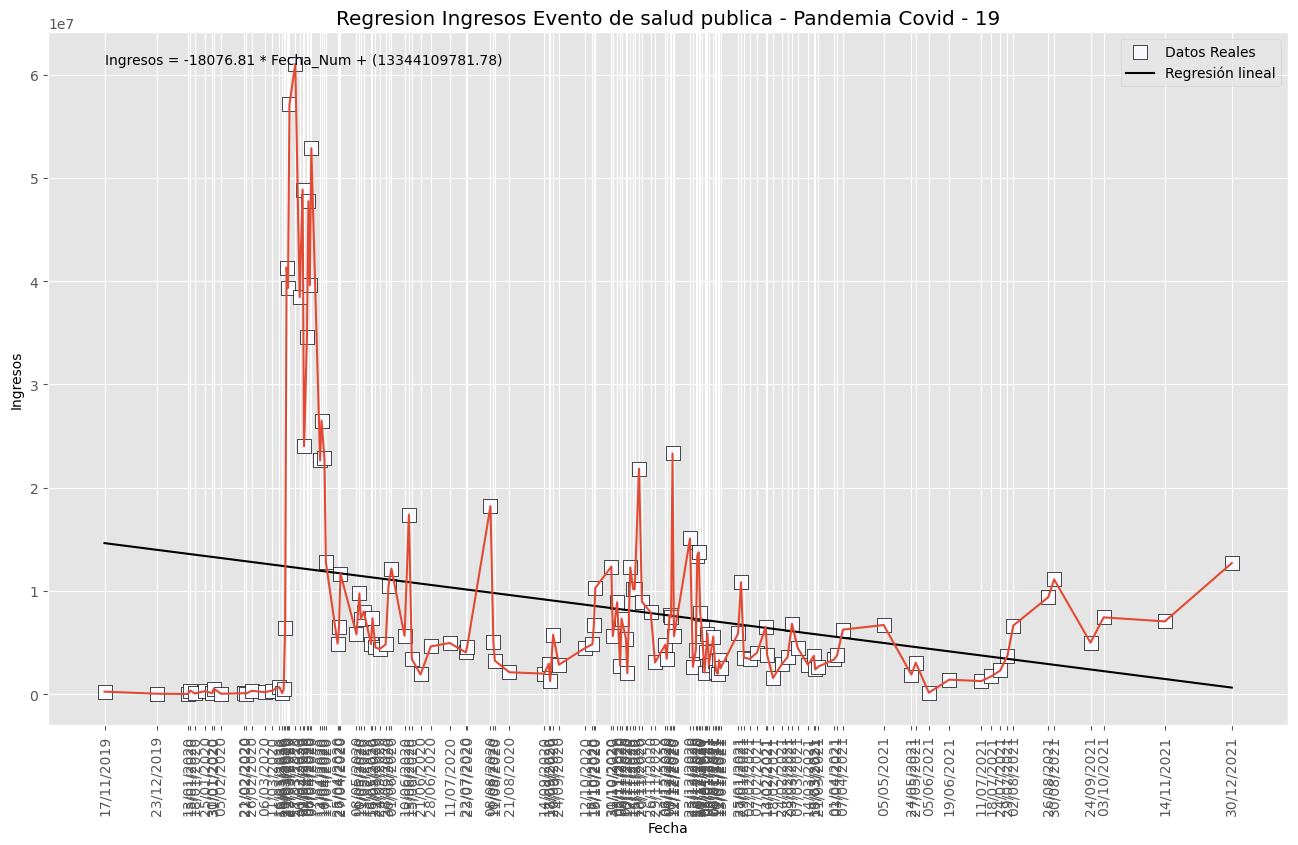

In [4]:
for i in range(len(SubGrupos)):
    x = SubGrupos[i]["Fecha"].values
    y = SubGrupos[i]["Suma de Valor transaccion"].values
    
    #Tome los datos reales y vuevalos fecha date time y luego numeros cardinales
    datos = SubGrupos[i]
    datos["Fecha"] = datos['Fecha'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
    datos['Fecha'] = datos['Fecha'].apply(lambda x: x.toordinal())
    
    X = datos[['Fecha']]
    y_ = datos['Suma de Valor transaccion']
    
    #Crear objeto de entrenamiento regresion lineal
    regresion = linear_model.LinearRegression()
    
    # Entrenamos nuestro modelo
    regresion.fit(X, y_)
    
    # Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
    predicciones = regresion.predict(X)
    
    # Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
    print('Coeficiente: \n', regresion.coef_)

    # Este es el valor donde corta el eje Y (en X=0)
    print('termino independiente: \n', regresion.intercept_)

    # Error Cuadrado Medio
    print("Error cuadratico medio: %.2f" % mean_squared_error(y, predicciones))

    # Puntaje de Varianza. El mejor puntaje es un 1.0
    print('Varianza: %.2f' % r2_score(y, predicciones))
    
    
    plt.xlabel('Fecha')
    plt.ylabel('Ingresos')
    #Titulo del Grafico
    #Try por si hay algun error
    try:
        plt.title(f'Regresion Ingresos {SubGrupos[i]["GRUPO"].iloc[1]} - {SubGrupos[i]["SUB GRUPO"].iloc[1]}')
    except:
        plt.title(f'Regresion Ingresos {SubGrupos[i]["GRUPO"].iloc[0]} - {SubGrupos[i]["SUB GRUPO"].iloc[0]}')
    
    plt.scatter(datos["Fecha"], y, c=colores[i], s=100, marker ="s", edgecolor ="black", label = "Datos Reales")
    plt.plot(datos["Fecha"], predicciones, color='black', label='Regresión lineal')
    plt.xticks(datos["Fecha"], x, rotation='vertical')
    
    
    # Mostrar ecuación en el gráfico
    ecuacion = f"Ingresos = {regresion.coef_[0]:.2f} * Fecha_Num + ({regresion.intercept_:.2f})"
    plt.text(datos['Fecha'].iloc[0], y_.max(), ecuacion, fontsize=8)
    
    
    plt.plot(datos['Fecha'], y_)
    plt.legend()
    
    #Guardar imagenes
    plt.savefig(f'./graficos/regresion {i}.png', dpi=1000, bbox_inches='tight')
    plt.show()


